# 434nm Graphs and Peak Difference

In [1]:
#Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils

In [2]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 434nm Graphs and Peak Difference

In [3]:
df434 = pd.read_csv('HD_5Angstroms_434.csv')
df434 = df434.reset_index(drop = True)
df434.columns = ['ds', 'nA']

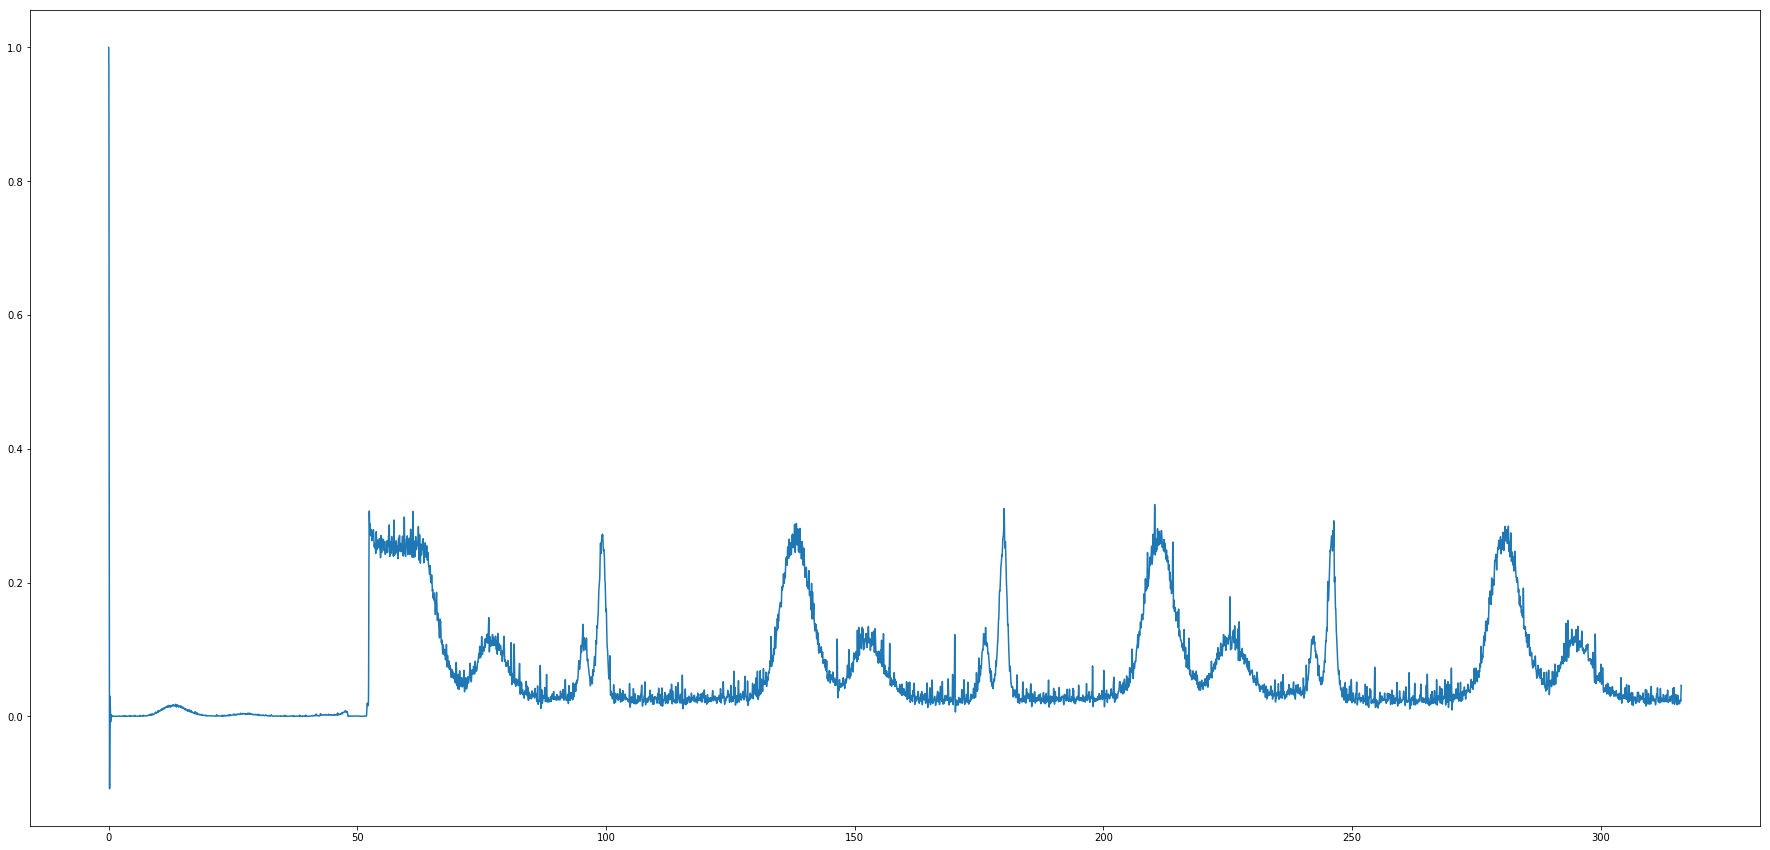

In [4]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df434.ds, df434.nA)
plt.show()

## First Peaks

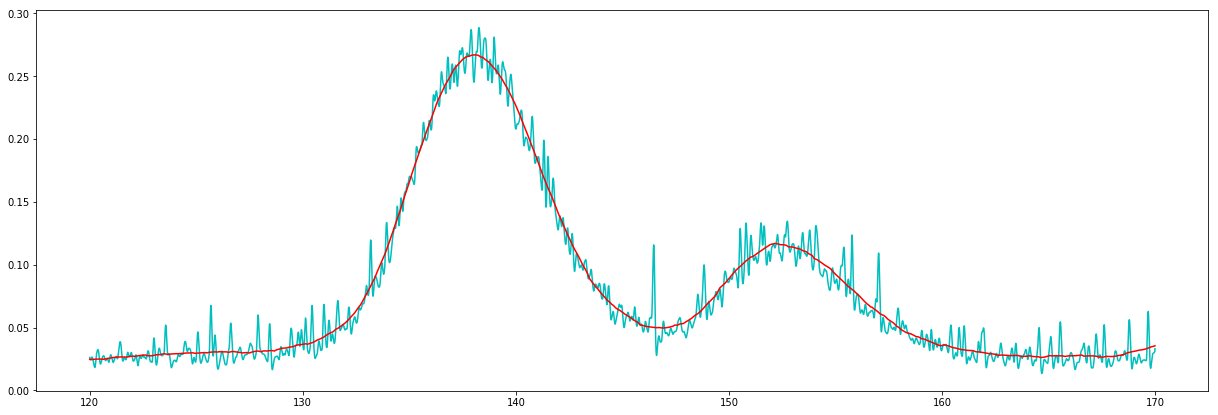

In [5]:
df434a=df434[(df434.ds < 170)&(df434.ds >120)].reset_index(drop=True)
#plt.figure(figsize=(31,15), facecolor='w')
#plt.plot(df656a.ds, df656a.nA)
#plt.show()
yhata=savitzky_golay(np.asarray(df434a.nA),30001,3) #window size 11, polynomial order 3
yhata.shape
x434a=np.asarray(df434a.ds)
plt.figure(figsize=(21,7), facecolor='w')
plt.plot(x434a, df434a.nA, 'c-')
plt.plot(x434a, yhata, 'r-')
plt.show()

## Second Peaks

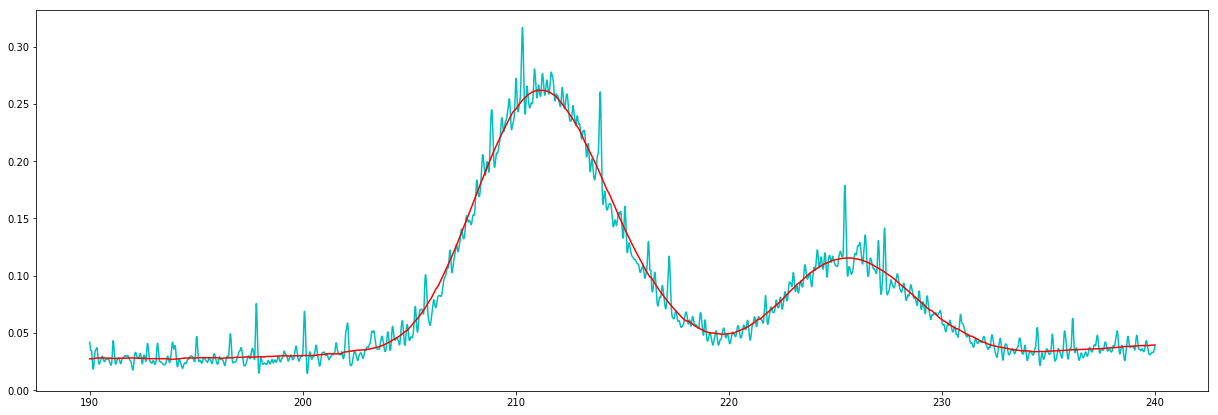

In [6]:
df434b=df434[(df434.ds < 240)&(df434.ds >190)].reset_index(drop=True)
#plt.figure(figsize=(31,15), facecolor='w')
#plt.plot(df656a.ds, df656a.nA)
#plt.show()
yhatb=savitzky_golay(np.asarray(df434b.nA),40001,3) #window size 11, polynomial order 3
x434b=np.asarray(df434b.ds)
plt.figure(figsize=(21,7), facecolor='w')
plt.plot(x434b, df434b.nA, 'c')
plt.plot(x434b, yhatb, 'r')
plt.show()

## Third Peaks

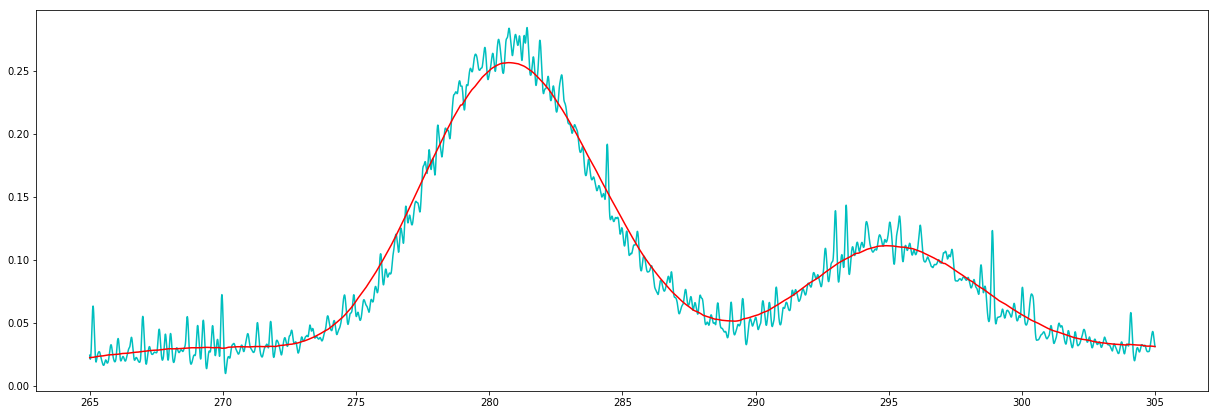

In [7]:
df434c=df434[(df434.ds < 305)&(df434.ds >265)].reset_index(drop=True)
#plt.figure(figsize=(31,15), facecolor='w')
#plt.plot(df656a.ds, df656a.nA)
#plt.show()
yhatc=savitzky_golay(np.asarray(df434c.nA),50001,3) #window size 11, polynomial order 3
yhatc.shape
x434c=np.asarray(df434c.ds)
plt.figure(figsize=(21,7), facecolor='w')
plt.plot(x434c, df434c.nA, 'c-')
plt.plot(x434c, yhatc, 'r-')
plt.show()

## Shift Values

#### First Peaks

[ 89646 159566 161230 163222]
(array([ 138.049604,  152.174364,  152.508844,  152.910604]), array([ 0.2669225 ,  0.11689609,  0.11593829,  0.1142454 ]))


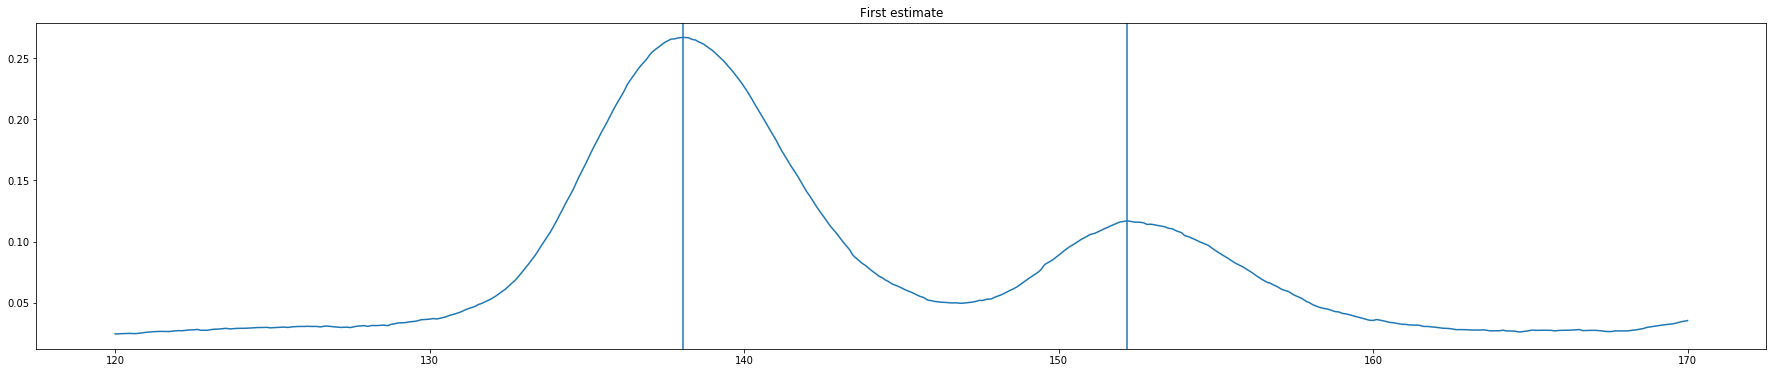

In [8]:
indexes = peakutils.indexes(yhata, thres=0.2, min_dist=1100)
print(indexes)
print(x434a[indexes], yhata[indexes])
plt.figure(figsize=(31,6))
plt.plot(x434a, yhata)
plt.axvline(x434a[indexes][0])
plt.axvline(x434a[indexes][1])
plt.title('First estimate')
plt.show()

#### Second Peaks

[104064 175936]
(array([ 211.048124,  225.56734 ]), array([ 0.26215312,  0.1154482 ]))


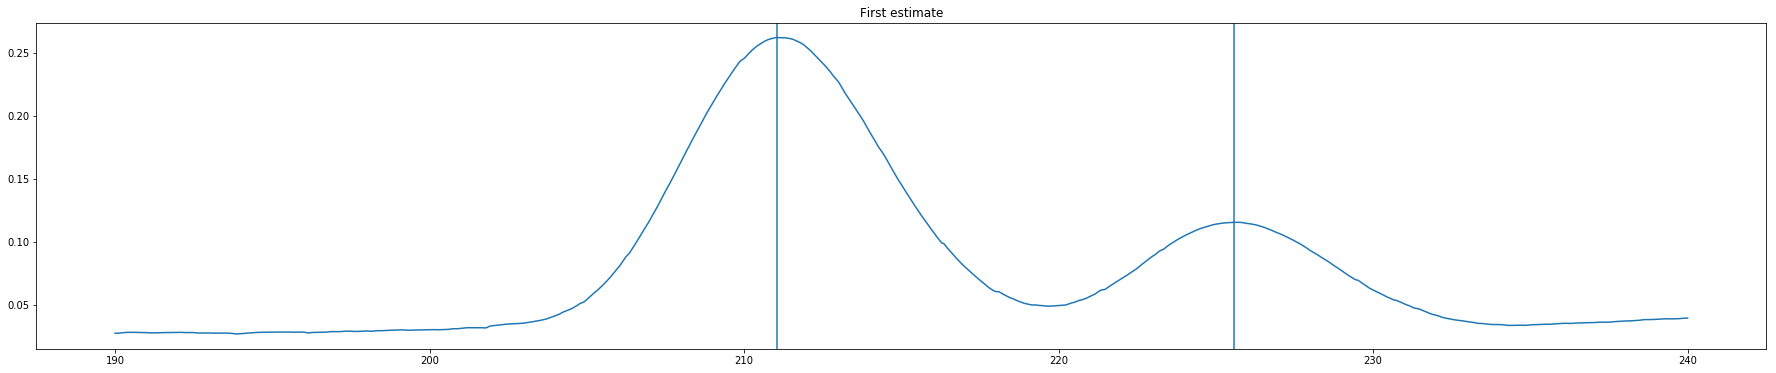

In [9]:
indexes = peakutils.indexes(yhatb, thres=0.2, min_dist=1100)
print(indexes)
print(x434b[indexes], yhatb[indexes])
plt.figure(figsize=(31,6))
plt.plot(x434b, yhatb)
plt.axvline(x434b[indexes][0])
plt.axvline(x434b[indexes][1])
plt.title('First estimate')
plt.show()

#### Third Peaks

[ 77868 148211]
(array([ 280.7259  ,  294.887884]), array([ 0.25665134,  0.11118906]))


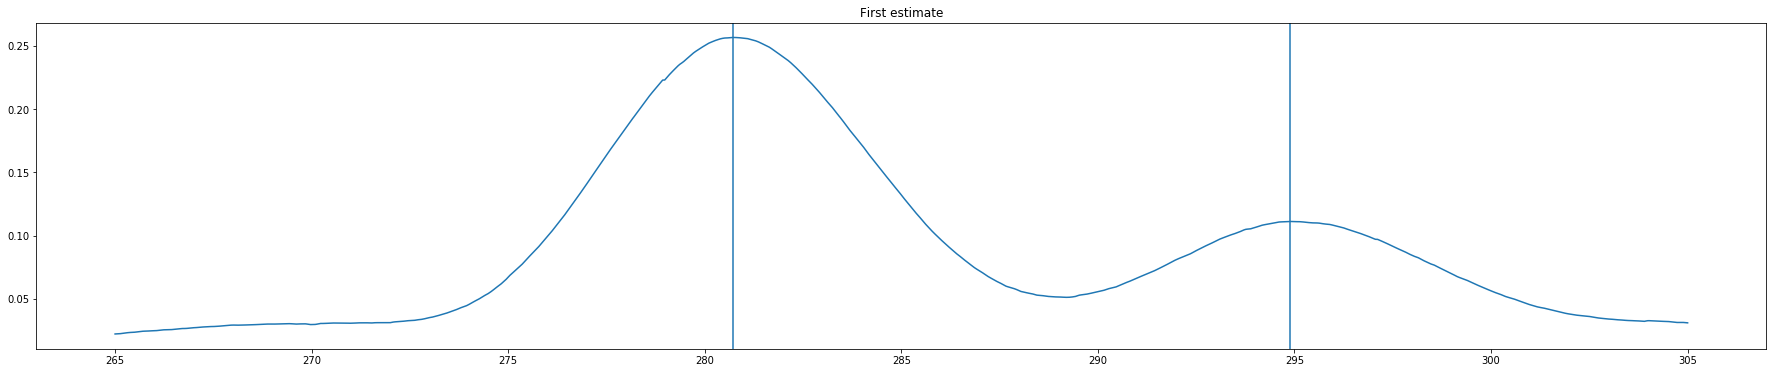

In [10]:
indexes = peakutils.indexes(yhatc, thres=0.1, min_dist=1100)
print(indexes)
print(x434c[indexes], yhatc[indexes])
plt.figure(figsize=(31,6))
plt.plot(x434c, yhatc)
plt.axvline(x434c[indexes][0])
plt.axvline(x434c[indexes][1])
plt.title('First estimate')
plt.show()

## 434nm Peak Shift Values

In [11]:
deltaA = (x434a[indexes][1] - x434a[indexes][0])
print ((deltaA/12)*10**-10)
deltaB = (x434b[indexes][1] - x434b[indexes][0])
print ((deltaB/12)*10**-10)
deltaC = (x434c[indexes][1] - x434c[indexes][0])
print ((deltaC/12)*10**-10)

1.18419866667e-10
1.18422566667e-10
1.18016533333e-10


In [14]:
## balmer calculates difference between the expected values of frequency peaks
# 5->2 transition correlates to 434nm light
import balmer as B
B.HDBalmer(5,2)

(4.3393675276362387e-07, 4.3405492543067054e-07, -1.1817266704666817e-10)

Data determined values are close to calculated values, work on averaging values